In [1]:
import fastai.vision.all as fv
import numpy as np
import pandas as pd
import torch
from pathlib import Path

In [2]:
cars_source = Path("stanford-cars-small/")
images = fv.get_image_files(cars_source)

Apartir del dataset version small modifiqué el datablock en base a la configuracion de los archivos de este
https://docs.fast.ai/tutorial.datablock

In [ ]:
cars = pd.read_csv(cars_source/"image_categories.csv", names = ["fname","labels","is_valid"], skiprows = 1)

In [4]:
def load_data(file, img_size, batch_size):
    tfms = fv. aug_transforms(flip_vert = True,
                              max_rotate = 360,
                              max_lighting = 0.25,
                              max_zoom = 1.2,
                              max_warp = 0.2
                             )
    data = fv.DataBlock(blocks     = (fv.ImageBlock, fv.CategoryBlock),
                        get_x      = fv.ColReader( 0, pref = cars_source/"images"),
                        get_y      = fv.ColReader( 1),
                        splitter   = fv.ColSplitter(),
                        item_tfms  = fv.Resize(img_size),
                        batch_tfms = tfms
                       )
    return data.dataloaders(file, bs = batch_size)

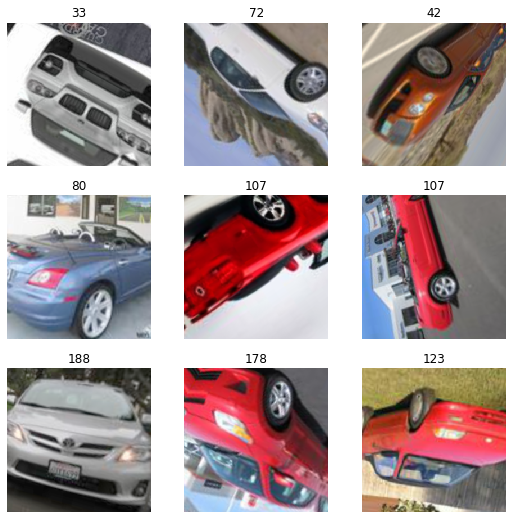

In [5]:
data = load_data( cars, img_size = 256, batch_size = 128)
data.show_batch()

In [8]:
x,y = data.one_batch()
x.shape

torch.Size([128, 3, 256, 256])

In [9]:
y

TensorCategory([ 76, 173,  97,  20, 191,  76,  55, 182, 192,  14,  96, 125,   5,   6,
         81,  91,  33,  58, 180, 118, 168,   0, 106,  58,  32, 116, 157,  13,
        195, 152, 139, 143,  43,  37, 125,  32, 132,  34, 141,  59,  66, 153,
         81, 171,  25,  27,  62,  24,  33,  52,  96,  32,  57,  52,  68, 124,
        158, 173, 194, 104,  54, 134, 105,  68,   9,  53, 113,  53, 190, 115,
        130, 191, 162,  26, 171,   5,   4,   6, 135,  81,  74,  17, 114,  61,
        165,  17,  85,  41, 162,  38, 145,  94, 143, 163,  17, 154,  48,  49,
         37, 151, 169, 123, 115, 103,  94, 166, 123,  43, 171,   3, 162,  96,
        182,  45,   8, 186,   7,  57,  18,  59,  17, 185,  21, 147,  70,   7,
        124, 154], device='cuda:0')

In [10]:
learner = fv.cnn_learner( data, fv.resnet18, metrics = fv.accuracy)

In [11]:
learner.summary()

Sequential (Input shape: ['128 x 3 x 256 x 256'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               128 x 64 x 128 x 12  9,408      False     
________________________________________________________________
BatchNorm2d          128 x 64 x 128 x 12  128        True      
________________________________________________________________
ReLU                 128 x 64 x 128 x 12  0          False     
________________________________________________________________
MaxPool2d            128 x 64 x 64 x 64   0          False     
________________________________________________________________
Conv2d               128 x 64 x 64 x 64   36,864     False     
________________________________________________________________
BatchNorm2d          128 x 64 x 64 x 64   128        True      
________________________________________________________________
ReLU                 128 x 64 x 64 x 64   0          False     
________________________________________________

SuggestedLRs(lr_min=0.004786301031708717, lr_steep=0.009120108559727669)

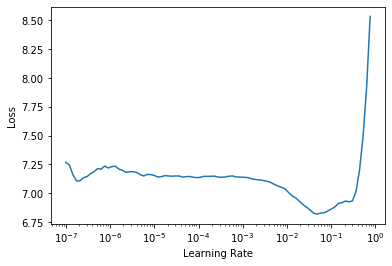

In [12]:
learner.lr_find()

In [13]:
learner.fit_one_cycle( 3, lr_max = 0.009120108559727669 )

In [14]:
learner.fit_one_cycle( 3, lr_max = 0.004786301031708717 )

In [15]:
learner.unfreeze()

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=7.585775847473997e-07)

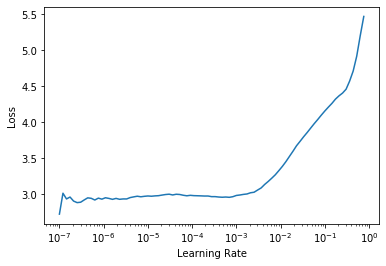

In [16]:
learner.lr_find()

In [19]:
learner.fit_one_cycle( 4, lr_max = slice(6.309573450380412e-08, 0.004786301031708717 ) )

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.02754228748381138)

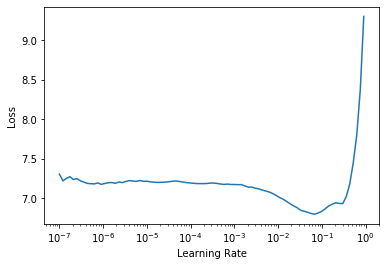

In [20]:
learner = fv.cnn_learner( data, fv.resnet34, metrics = fv.accuracy)
learner.lr_find()

In [21]:
learner.fit_one_cycle( 4, lr_max = 0.02754228748381138 )

SuggestedLRs(lr_min=1.318256749982538e-07, lr_steep=6.309573450380412e-07)

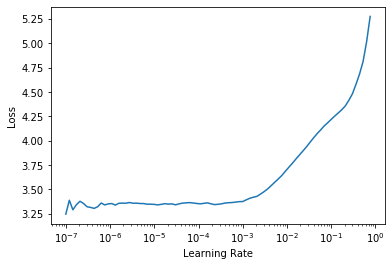

In [22]:
learner.unfreeze()
learner.lr_find()

In [23]:
learner.fit_one_cycle( 10, lr_max = slice(1.318256749982538e-07, 0.006918309628963471 ) )

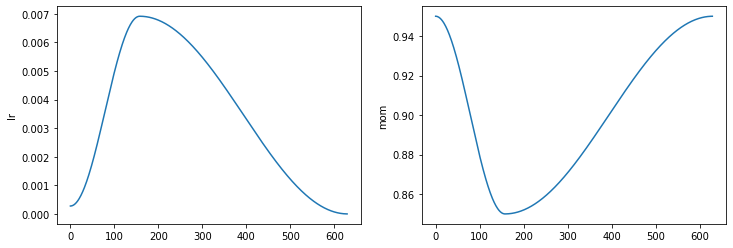

In [24]:
learner.recorder.plot_sched()

Aquí paré el kernel por que se me terminó la memoria, cambio el batch_size  a 64 y el max_rotate a 180

In [6]:
#del learner
#del data
torch.cuda.empty_cache()

In [1]:
import fastai.vision.all as fv
import numpy as np
import pandas as pd
import torch
from pathlib import Path

cars_source = Path("stanford-cars-small/")
images = fv.get_image_files(cars_source)

cars = pd.read_csv(cars_source/"image_categories.csv", names = ["fname","labels","is_valid"], skiprows = 1)

In [3]:
def load_data(file, img_size, batch_size):
    tfms = fv. aug_transforms(flip_vert = True,
                              max_rotate = 180,
                              max_lighting = 0.25,
                              max_zoom = 1.2,
                              max_warp = 0.2
                             )
    data = fv.DataBlock(blocks     = (fv.ImageBlock, fv.CategoryBlock),
                        get_x      = fv.ColReader( 0, pref = cars_source/"images"),
                        get_y      = fv.ColReader( 1),
                        splitter   = fv.ColSplitter(),
                        item_tfms  = fv.Resize(img_size),
                        batch_tfms = tfms
                       )
    return data.dataloaders(file, bs = batch_size)
data = load_data( cars, img_size = 256, batch_size = 64)

SuggestedLRs(lr_min=0.0033113110810518267, lr_steep=0.015848932787775993)

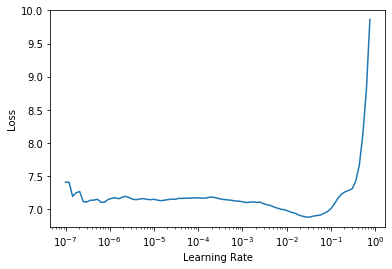

In [4]:
learner = fv.cnn_learner( data, fv.resnet50, metrics = fv.accuracy)
learner.lr_find()

In [5]:
learner.fit_one_cycle( 4, lr_max = 0.015848932787775993 )

SuggestedLRs(lr_min=3.0199516913853586e-06, lr_steep=6.309573450380412e-07)

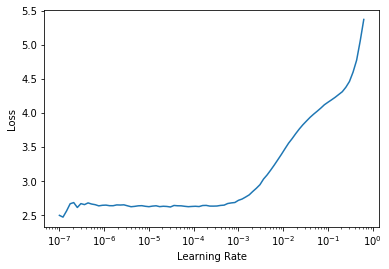

In [6]:
learner.unfreeze()
learner.lr_find()

In [7]:
3.0199516913853586e-06>6.309573450380412e-07

True

In [8]:
learner.fit_one_cycle( 10, lr_max = slice(6.309573450380412e-07, 0.0033113110810518267 ) )

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


SuggestedLRs(lr_min=0.002290867641568184, lr_steep=0.004365158267319202)

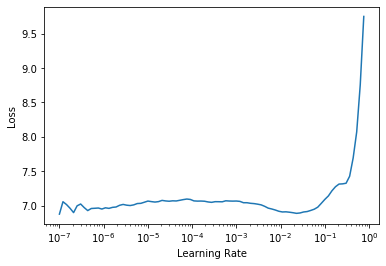

In [9]:
learner = fv.cnn_learner( data, fv.resnet101, metrics = fv.accuracy)
learner.lr_find()

In [10]:
learner.fit_one_cycle( 4, lr_max = 0.004365158267319202 )

SuggestedLRs(lr_min=1.58489319801447e-07, lr_steep=1.0964781722577754e-06)

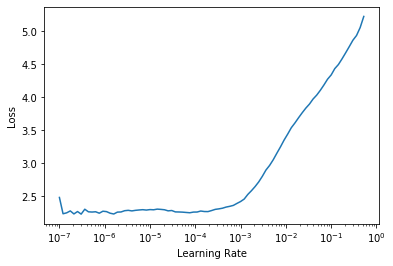

In [11]:
learner.unfreeze()
learner.lr_find()

In [12]:
learner.fit_one_cycle( 10, lr_max = slice(1.58489319801447e-07, 1.0964781722577754e-06 ) )

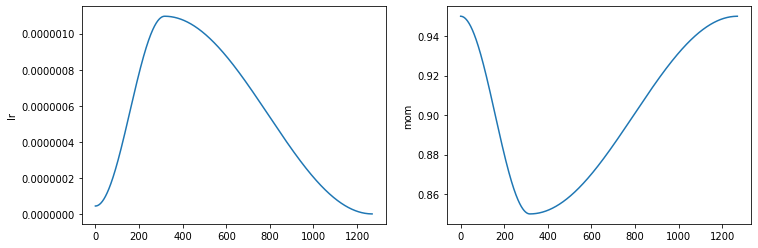

In [16]:
learner.recorder.plot_sched()

In [13]:
interp = fv.ClassificationInterpretation.from_learner(learner)

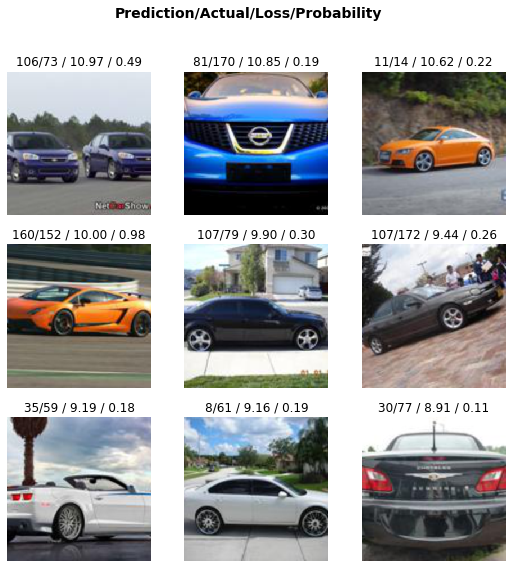

In [14]:
interp.plot_top_losses(9)

Cambio el max rotate de 180 a 270 y img_size a 224 y 8 ciclos de entrenamiento en todas las capas y 5 en las primeras

In [17]:
def load_data(file, img_size, batch_size):
    tfms = fv. aug_transforms(flip_vert = True,
                              max_rotate = 270,
                              max_lighting = 0.25,
                              max_zoom = 1.2,
                              max_warp = 0.2
                             )
    data = fv.DataBlock(blocks     = (fv.ImageBlock, fv.CategoryBlock),
                        get_x      = fv.ColReader( 0, pref = cars_source/"images"),
                        get_y      = fv.ColReader( 1),
                        splitter   = fv.ColSplitter(),
                        item_tfms  = fv.Resize(img_size),
                        batch_tfms = tfms
                       )
    return data.dataloaders(file, bs = batch_size)
data = load_data( cars, img_size = 224, batch_size = 64)

SuggestedLRs(lr_min=0.0033113110810518267, lr_steep=0.013182567432522774)

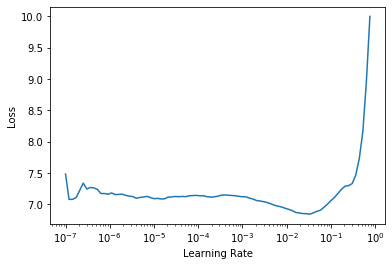

In [18]:
learner = fv.cnn_learner( data, fv.resnet152, metrics = fv.accuracy)
learner.lr_find()

In [19]:
learner.fit_one_cycle( 5, lr_max = 0.013182567432522774 )

SuggestedLRs(lr_min=1.4454397387453355e-06, lr_steep=1.5848931980144698e-06)

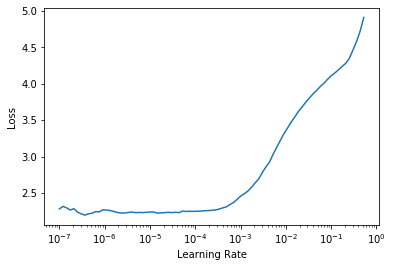

In [20]:
learner.unfreeze()
learner.lr_find()

In [21]:
learner.fit_one_cycle( 8, lr_max = slice(1.4454397387453355e-06, 0.0033113110810518267 ) )

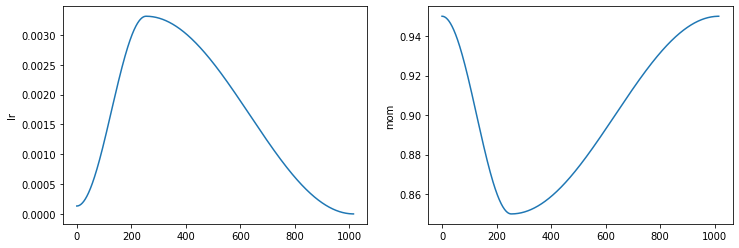

In [22]:
learner.recorder.plot_sched()

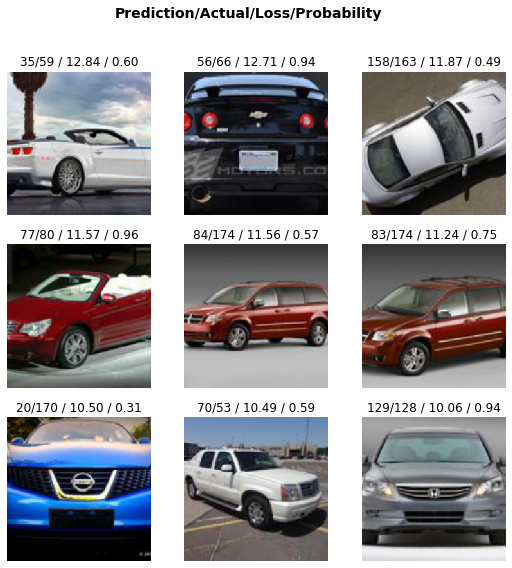

In [23]:
interp = fv.ClassificationInterpretation.from_learner(learner)
interp.plot_top_losses(9)

In [24]:
def load_data(file, img_size, batch_size):
    tfms = fv. aug_transforms(flip_vert = True,
                              max_rotate = 180,
                              max_lighting = 0.25,
                              max_warp = 0.2
                             )
    data = fv.DataBlock(blocks     = (fv.ImageBlock, fv.CategoryBlock),
                        get_x      = fv.ColReader( 0, pref = cars_source/"images"),
                        get_y      = fv.ColReader( 1),
                        splitter   = fv.ColSplitter(),
                        item_tfms  = fv.Resize(img_size),
                        batch_tfms = tfms
                       )
    return data.dataloaders(file, bs = batch_size)
data = load_data( cars, img_size = 224, batch_size = 64)

SuggestedLRs(lr_min=0.0033113110810518267, lr_steep=0.002511886414140463)

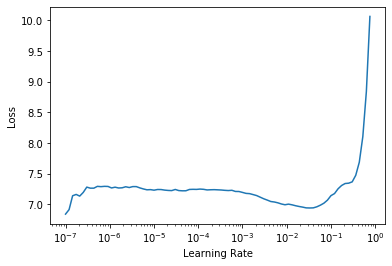

In [25]:
learner = fv.cnn_learner( data, fv.resnet152, metrics = fv.accuracy)
learner.lr_find()

In [26]:
learner.fit_one_cycle( 5, lr_max = 0.002511886414140463 )

SuggestedLRs(lr_min=1.737800812406931e-06, lr_steep=5.754399353463668e-06)

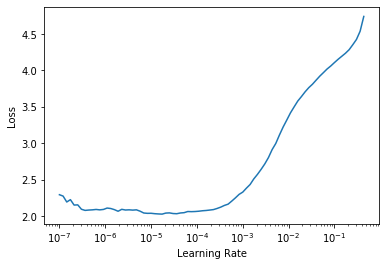

In [27]:
learner.unfreeze()
learner.lr_find()

In [28]:
learner.fit_one_cycle( 8, lr_max = slice(1.4454397387453355e-06, 0.0033113110810518267 ) )

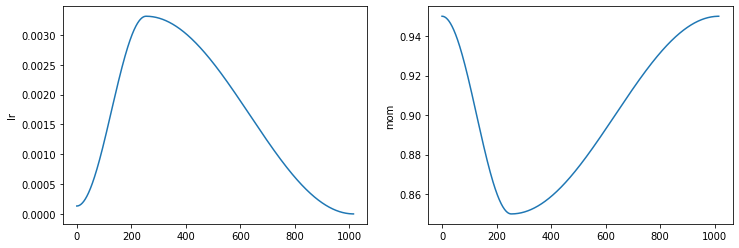

In [29]:
learner.recorder.plot_sched()

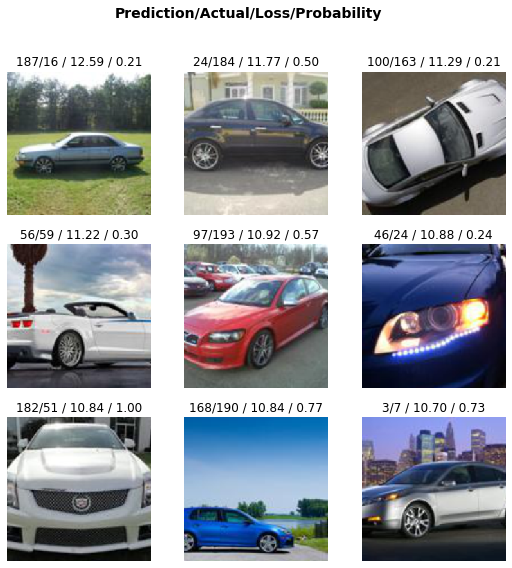

In [30]:
interp = fv.ClassificationInterpretation.from_learner(learner)
interp.plot_top_losses()

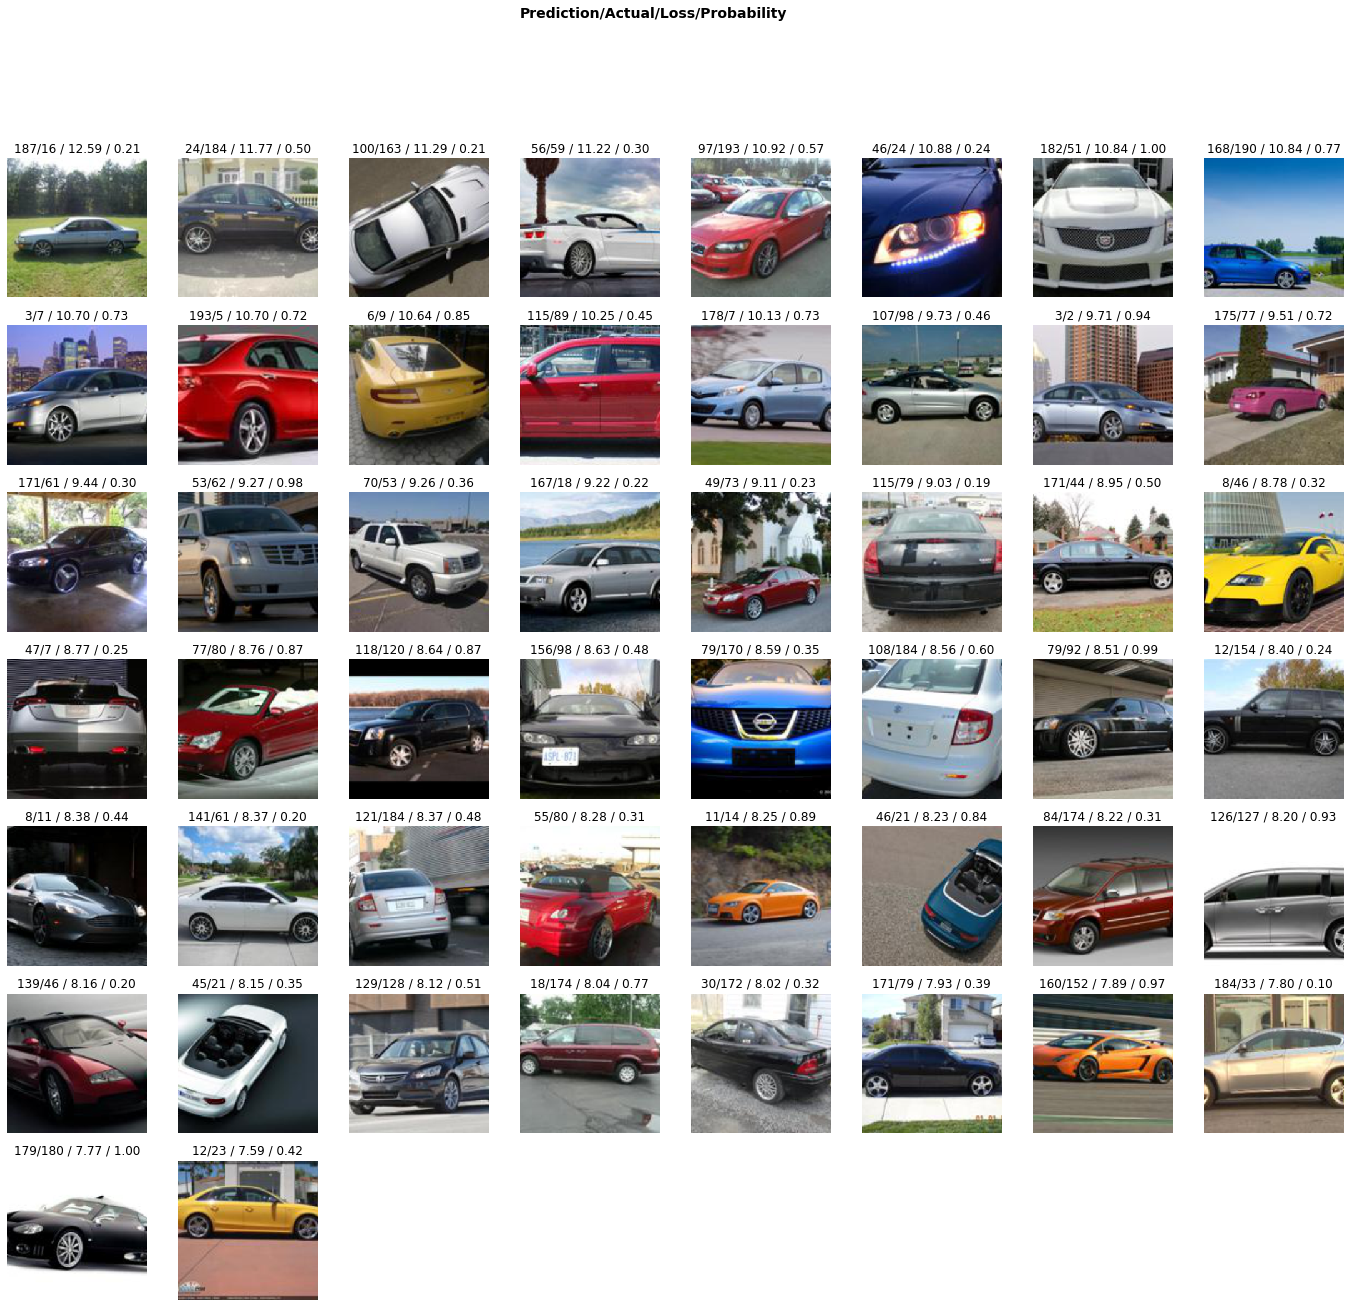

In [32]:
interp.plot_top_losses(50)